## The Dataset
The Pima Indians Diabetes Dataset is a publicly available test dataset widely used for diabetes research and predictive modeling. It contains 768 observations of females of Pima Indian heritage aged 21 years or older. The dataset includes eight medical predictor variables and one target variable. The predictor variables are:

Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
Blood Pressure: Diastolic blood pressure (mm Hg)
Skin Thickness: Triceps skinfold thickness (mm)
Insulin: 2-hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
Diabetes Pedigree Function: A function that scores the likelihood of diabetes based on family history
Age: Age in years
The target variable is ‘Outcome’’ which indicates whether the patient had diabetes (1) or not (0). This training dataset is particularly useful for testing machine learning algorithms for binary classification tasks.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
diabetes_df = pd.read_csv(r"C:\Users\RutujaKshirsagar\OneDrive - Spirangle Technologies Private Limited\Documents\python notebooks\diabetes.csv") 
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## *Exploratory Data Analysis (EDA)*

In [6]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [9]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [11]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We observe no missing values from the above code, which is misleading. In this dataset, missing values are encoded as 0. Therefore, we must replace the 0 values with NaN and then blame them properly.

In [12]:
diabetes_df_copy = diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# Showing the count of NaNs
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


We will replace the zeros with NaN values to maintain the dataset’s authenticity and then attribute these missing values to the respective columns’ mean or median.

In [13]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace=True)

## *Data Visualization*

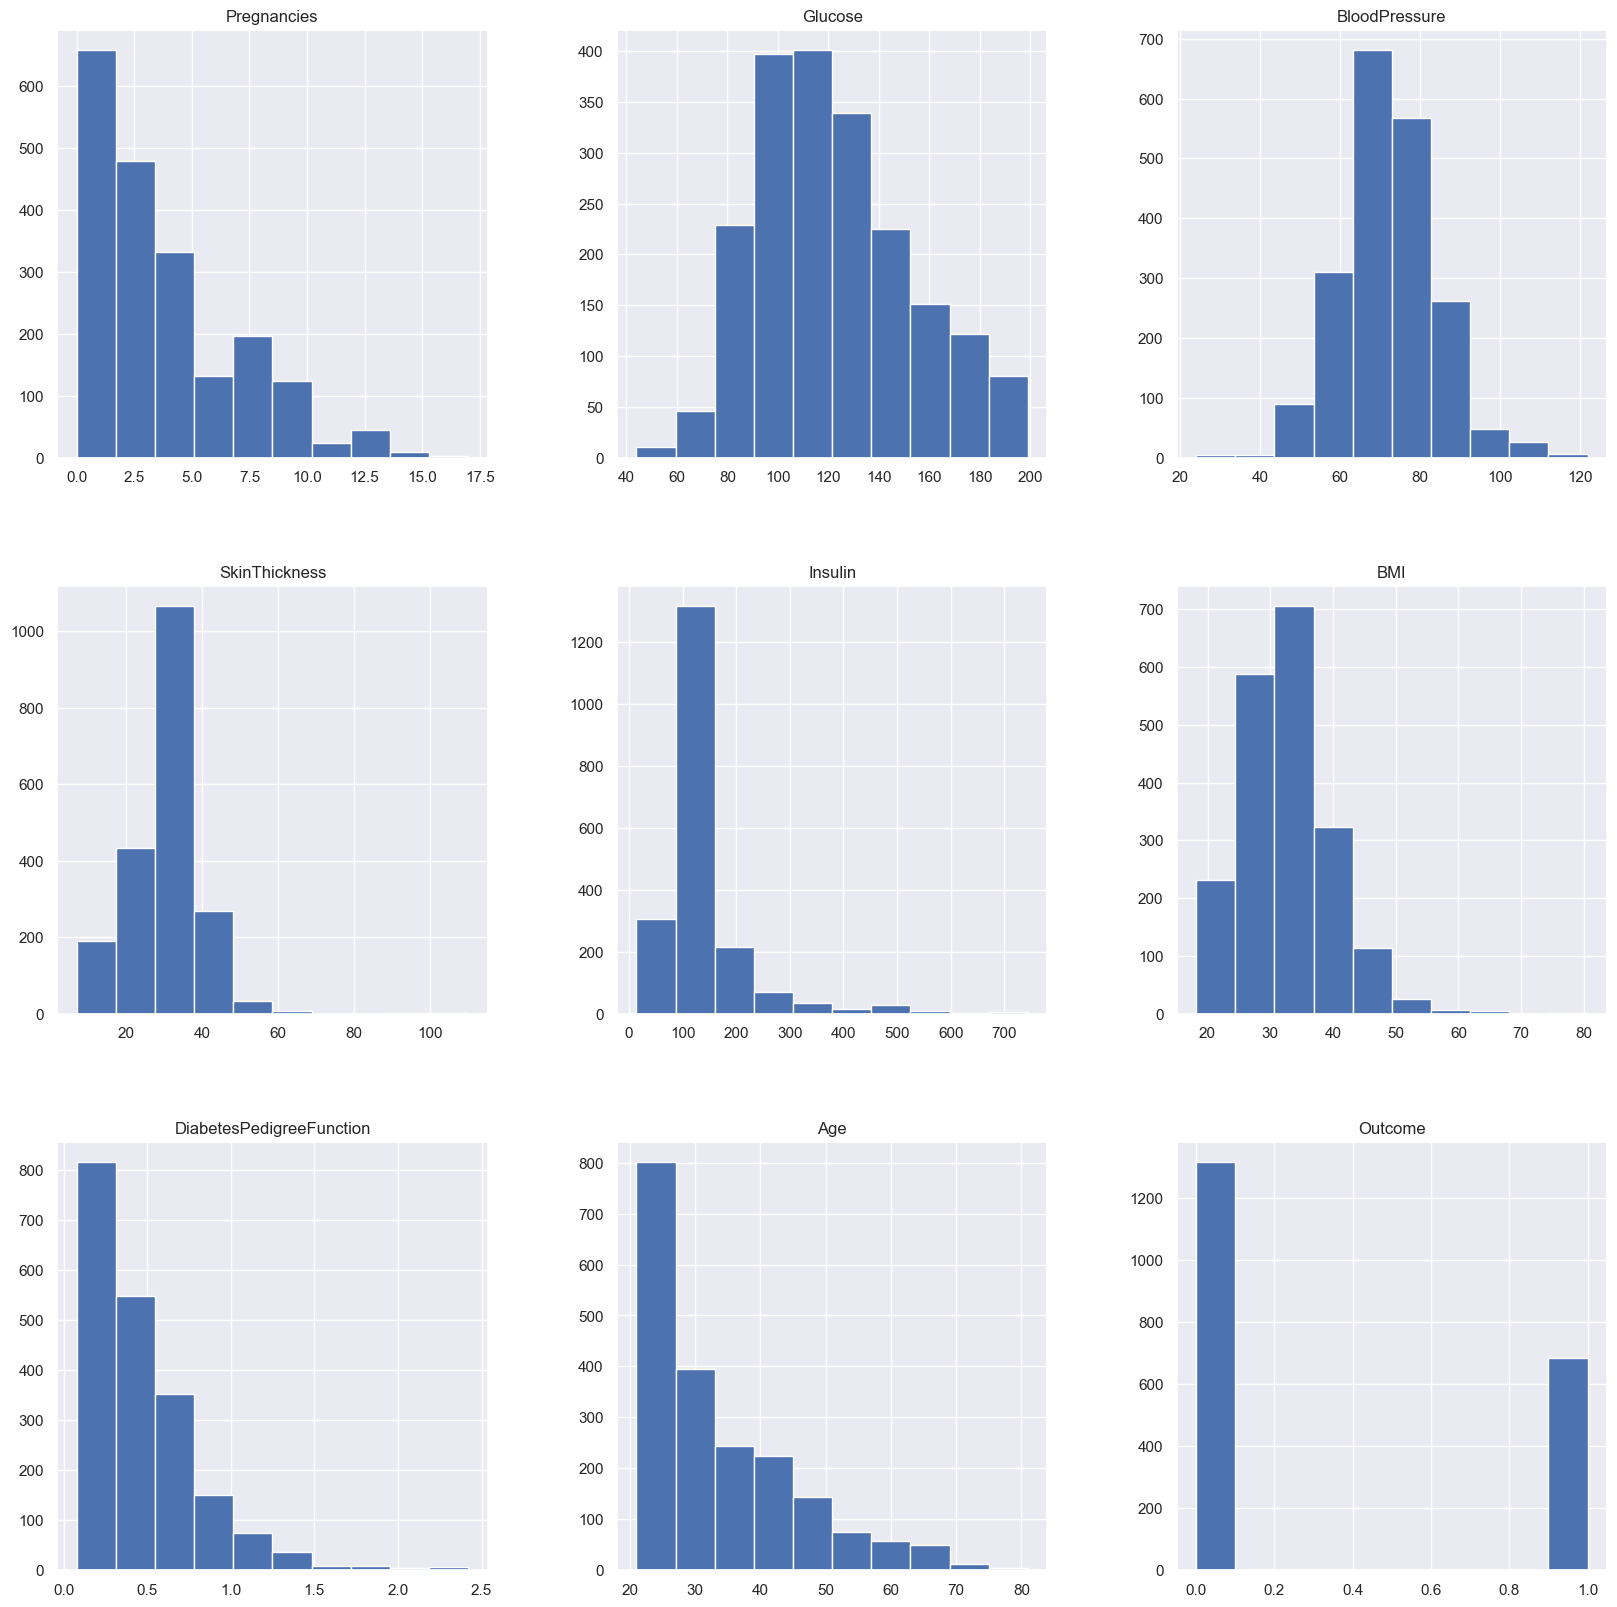

In [14]:
p = diabetes_df_copy.hist(figsize=(20, 20))

Outcome
0    1316
1     684
Name: count, dtype: int64


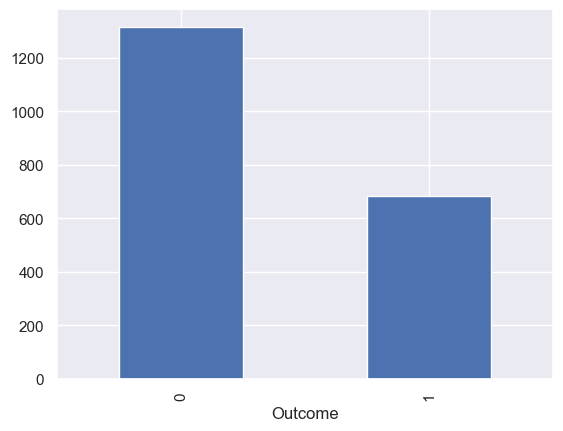

In [15]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p = diabetes_df.Outcome.value_counts().plot(kind="bar")

The above visualization indicates that our training dataset is imbalanced. The number of non-diabetic patients is almost double that of diabetic patients.

*Distribution and Outliers of Insulin*

<Axes: >

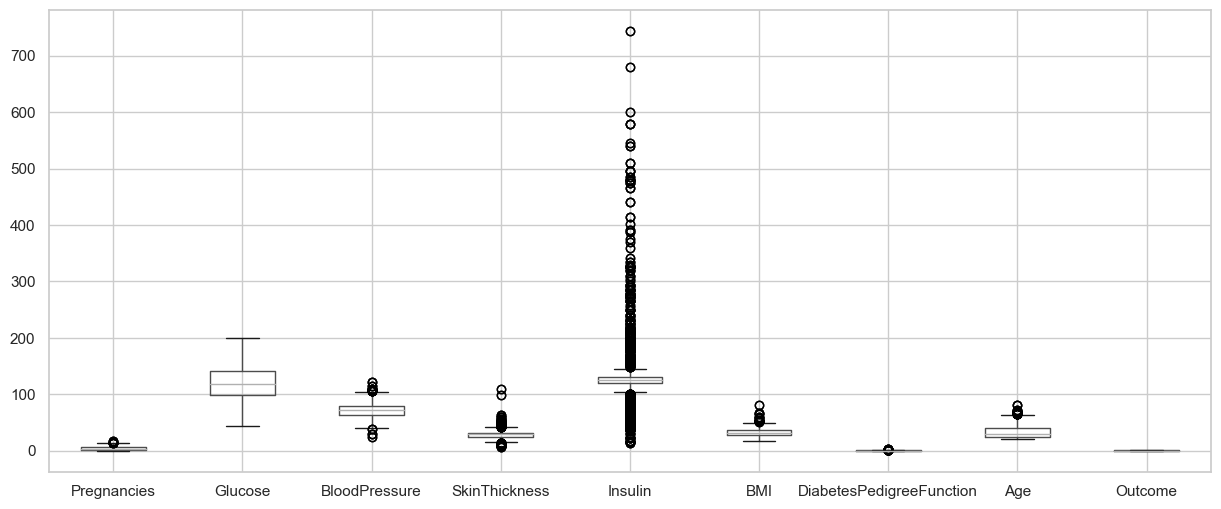

In [27]:
#box plot for outlier visualization
sns.set(style="whitegrid")
diabetes_df_copy.boxplot(figsize=(15,6))

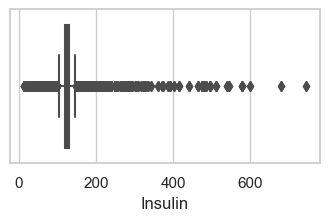

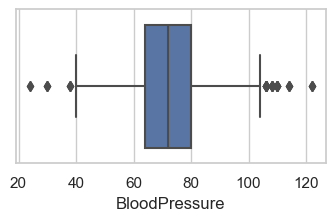

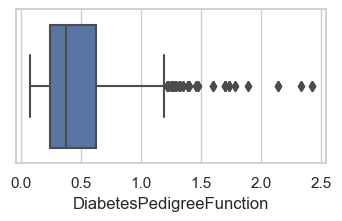

In [28]:

#box plot
sns.set(style="whitegrid")

# sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=diabetes_df_copy['Insulin'])
plt.show()
sns.boxplot(x=diabetes_df_copy['BloodPressure'])
plt.show()
sns.boxplot(x=diabetes_df_copy['DiabetesPedigreeFunction'])
plt.show()

In [29]:
#outlier remove

Q1=diabetes_df_copy.quantile(0.25)
Q3=diabetes_df_copy.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnancies                   1.000
Glucose                      99.000
BloodPressure                64.000
SkinThickness                25.000
Insulin                     120.000
BMI                          27.600
DiabetesPedigreeFunction      0.244
Age                          24.000
Outcome                       0.000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.000
Glucose                     141.000
BloodPressure                80.000
SkinThickness                32.000
Insulin                     130.000
BMI                          36.800
DiabetesPedigreeFunction      0.624
Age                          40.000
Outcome                       1.000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                  5.00
Glucose                     42.00
BloodPressure               16.00
SkinThickness                7.00
Insulin                     10.00
BMI                          9.20
DiabetesPedigreeFunction     0.38
Age                      

In [30]:
#outlier remove
df_out = diabetes_df_copy[~((diabetes_df_copy < (Q1 - 1.5 * IQR)) |(diabetes_df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
diabetes_df_copy.shape,df_out.shape

((2000, 9), (1021, 9))

<Axes: >

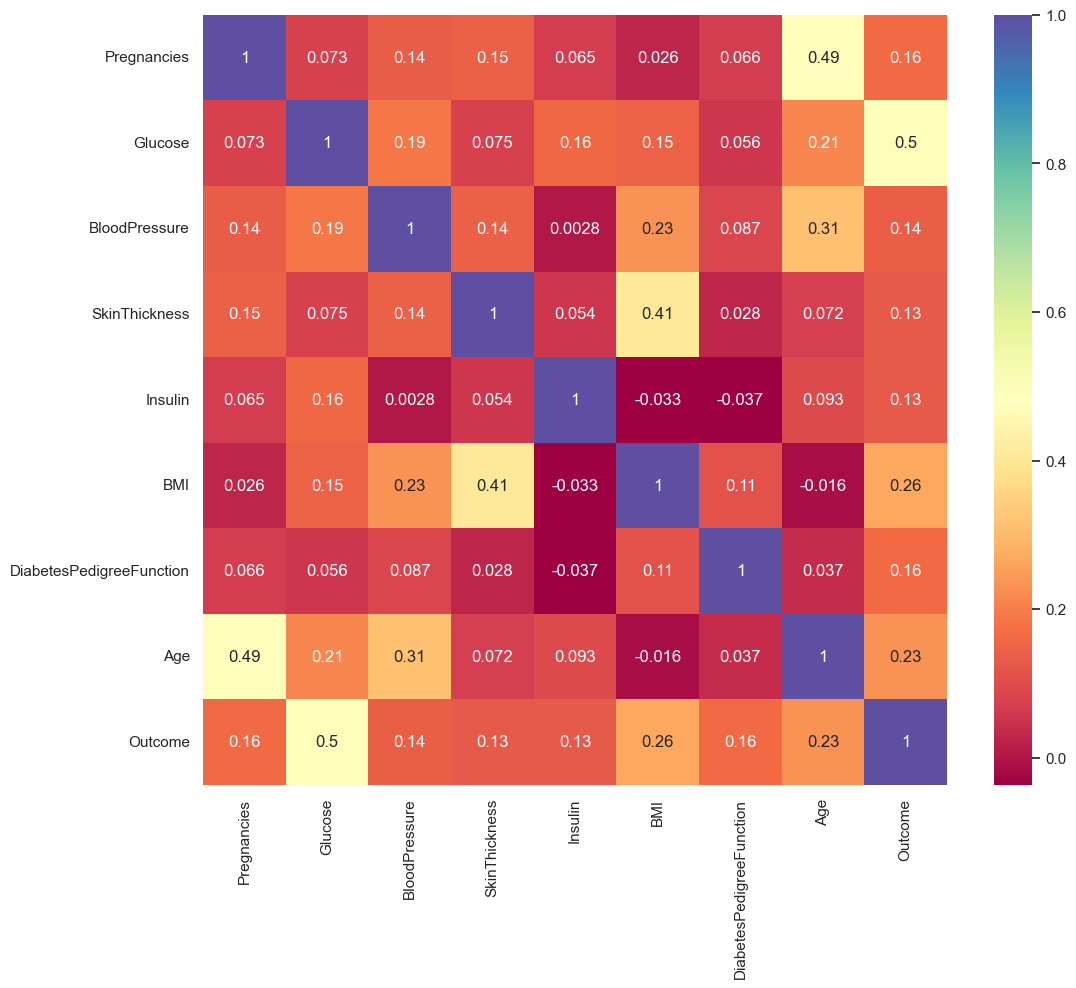

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_out.corr(), annot=True, cmap='Spectral')

*Applying Standard Scaling* 

Next, we will apply standard scaling to the training dataset. Standard scaling helps normalize the data, ensuring that each feature contributes equally to the machine-learning model:

In [33]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(df_out.drop(['Outcome'], axis=1)), 

columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.649364,0.623943,-1.084806,1.176313,0.076825,0.292897,-1.062932,1.206481
1,-1.255122,-1.267828,0.893292,0.391848,-0.103079,1.026403,-0.636280,-0.994339
2,-1.255122,0.869172,-0.055833,-0.000384,0.076825,1.983151,0.961652,-0.260732
3,-0.043607,-0.742336,-0.095757,-2.353778,0.076825,-0.982767,-0.390754,-0.535835
4,-0.649364,-1.092664,1.684531,0.195732,0.076825,0.276951,-0.398804,0.747977


After scaling, the values of all features are now on the same scale. This helps our machine learning model perform better because no single feature will dominate due to its larger values.

In [71]:
y = df_out.Outcome
y.head()

0    1
1    0
2    1
6    0
9    0
Name: Outcome, dtype: int64

The ‘Outcome’ column shows whether a patient has diabetes (1) or not (0). Understanding the target variable is essential to build an accurate predictive model.

## *Splitting the Dataset*

In [72]:
X = df_out.drop('Outcome', axis=1)
y = df_out['Outcome']

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

In [93]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
6,4,99.0,72.000000,17.0,126.0,25.6,0.294,28
9,2,89.0,90.000000,30.0,126.0,33.5,0.292,42


## *Random Forest*

In [74]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [75]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Training Accuracy =", format(metrics.accuracy_score(y_train, rfc_train)))

Training Accuracy = 1.0


In [76]:
rfc_predictions = rfc.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, rfc_predictions)))

Test Accuracy = 0.9707317073170731


In [77]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, rfc_predictions))
print(classification_report(y_test, rfc_predictions))

[[115   3]
 [  3  84]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.97      0.97      0.97        87

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## *Decision Tree*

In [78]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [79]:
dtree_predictions = dtree.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, dtree_predictions)))

Test Accuracy = 0.9609756097560975


In [80]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, dtree_predictions))
print(classification_report(y_test, dtree_predictions))

[[113   5]
 [  3  84]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       118
           1       0.94      0.97      0.95        87

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



## *XgBoost Classifier*

In [81]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
xgb_pred = xgb_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, xgb_pred)))

Test Accuracy = 0.9707317073170731


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

[[115   3]
 [  3  84]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.97      0.97      0.97        87

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## *Support Vector Machine (SVM)*

In [84]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [85]:
svc_pred = svc_model.predict(X_test)
print("Test Accuracy =", format(metrics.accuracy_score(y_test, svc_pred)))

Test Accuracy = 0.6829268292682927


## *Logistic Regression*

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
LR_pred=clf.predict(X_test)

In [96]:
print("Test Accuracy =", format(metrics.accuracy_score(y_test, LR_pred)))

Test Accuracy = 0.7170731707317073


## *Accuracy Comaprison*

In [97]:
import pandas as pd

# Storing the test accuracy scores
accuracy_scores = {
    "Random Forest": 0.9707317073170731,
    "Decision Tree": 0.9609756097560975,
    "XGBoost Classifier": 0.9707317073170731,
    "Support Vector Machine (SVM)": 0.6829268292682927,
    "Logistic regression":0.7170731707317073
}

# Converting the dictionary to a DataFrame
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Test Accuracy'])

# Sorting the DataFrame in descending order of Test Accuracy
accuracy_df = accuracy_df.sort_values(by='Test Accuracy', ascending=False)

# Displaying the DataFrame
print(accuracy_df)


                          Model  Test Accuracy
0                 Random Forest       0.970732
2            XGBoost Classifier       0.970732
1                 Decision Tree       0.960976
4           Logistic regression       0.717073
3  Support Vector Machine (SVM)       0.682927


Among the models tested, the Random Forest model performed the best with an accuracy of 0.970732

## *Feature Importance*

In [88]:
rfc.feature_importances_

array([0.08385175, 0.29166726, 0.10521103, 0.06185259, 0.04118597,
       0.14914823, 0.12406015, 0.14302301])

<Axes: >

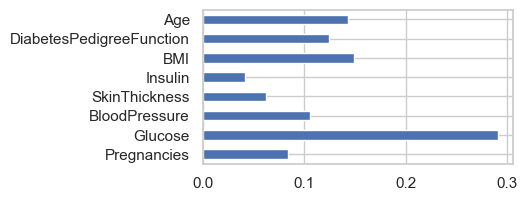

In [89]:
pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh')

From the graph above, it is clear that ‘Glucose’ is the most essential feature in this dataset. Visualizing feature importance helps us identify which features influence the model’s predictions most.

In [90]:
import pickle 

# Firstly, we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc) 

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model) 

# Lastly, after loading that model we will use this to make predictions 
rfc_from_pickle.predict(X_test)

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [91]:
rfc.predict([[0, 137, 40, 35, 168, 43.1, 2.228, 33]])

array([1], dtype=int64)

In [92]:
rfc.predict([[10, 101, 76, 48, 180, 32.9, 0.171, 63]])

array([0], dtype=int64)

In [98]:
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc, file)